<img src="https://raw.githubusercontent.com/dadosaocubo/classificacao/master/DadosAoCubo.png" alt="drawing" width="500"/>



[__D³__](https://dadosaocubo.com/) by [__Tiago Dias__](https://www.linkedin.com/in/diasctiago/) 

# Bibliotecas

In [ ]:
import requests
import json
import pandas as pd
from tqdm import tqdm
from time import sleep, time
from multiprocessing.pool import ThreadPool
import seaborn as sns
import matplotlib.pyplot as plt

# Requisição API

In [ ]:
# Requisição dos dados dos Deputados
url        = 'https://dadosabertos.camara.leg.br/api/v2/deputados'
parametros = {}
resposta   = requests.request("GET", url, params=parametros)
objetos    = json.loads(resposta.text)
dados      = objetos['dados']

In [ ]:
len(dados)

513

In [ ]:
dados[0]

{'email': 'dep.abiliosantana@camara.leg.br',
 'id': 204554,
 'idLegislatura': 56,
 'nome': 'Abílio Santana',
 'siglaPartido': 'PL',
 'siglaUf': 'BA',
 'uri': 'https://dadosabertos.camara.leg.br/api/v2/deputados/204554',
 'uriPartido': 'https://dadosabertos.camara.leg.br/api/v2/partidos/37906',
 'urlFoto': 'https://www.camara.leg.br/internet/deputado/bandep/204554.jpg'}

In [ ]:
# Selecionando todos os id dos deputados
id = []
for i in range(len(dados)):
    id.append(str(dados[i]['id']))

In [ ]:
id[:5]

['204554', '204521', '204379', '204560', '204528']

## Processamento individual por id



In [ ]:
# Requisição dos dados detalhes dos Deputados
def detalhe_deputado(id):
  url        = 'https://dadosabertos.camara.leg.br/api/v2/deputados/' + id
  parametros = {}
  resposta   = requests.request("GET", url, params=parametros)
  objetos    = json.loads(resposta.text)
  dados      = objetos['dados']
  return dados

In [ ]:
detalhe_deputado('204554')

{'cpf': '36607606504',
 'dataFalecimento': None,
 'dataNascimento': '1965-02-13',
 'escolaridade': 'Superior Incompleto',
 'id': 204554,
 'municipioNascimento': 'Salvador',
 'nomeCivil': 'JOSE ABILIO SILVA DE SANTANA',
 'redeSocial': [],
 'sexo': 'M',
 'ufNascimento': 'BA',
 'ultimoStatus': {'condicaoEleitoral': 'Titular',
  'data': '2019-02-01T11:45',
  'descricaoStatus': None,
  'email': 'dep.abiliosantana@camara.leg.br',
  'gabinete': {'andar': '5',
   'email': 'dep.abiliosantana@camara.leg.br',
   'nome': '531',
   'predio': '4',
   'sala': '531',
   'telefone': '3215-5531'},
  'id': 204554,
  'idLegislatura': 56,
  'nome': 'Abílio Santana',
  'nomeEleitoral': 'Abílio Santana',
  'siglaPartido': 'PL',
  'siglaUf': 'BA',
  'situacao': 'Exercício',
  'uri': 'https://dadosabertos.camara.leg.br/api/v2/deputados/204554',
  'uriPartido': 'https://dadosabertos.camara.leg.br/api/v2/partidos/37906',
  'urlFoto': 'https://www.camara.leg.br/internet/deputado/bandep/204554.jpg'},
 'uri': 'http

In [ ]:
inicio_processo = time()
deputado = detalhe_deputado('204521')
fim_processo = time()
processamento_individual = fim_processo - inicio_processo
print('Processamento individual por id:', round( (processamento_individual), 1 ), 'segundos')

Processamento individual por id: 0.6 segundos


In [ ]:
ids = id[:100]

In [ ]:
inicio_processo = time()
lista_api = []
for i in tqdm(ids):
  resultado_individual = detalhe_deputado(i)
  lista_api.append(resultado_individual)
fim_processo = time()
processamento_sequencial = fim_processo - inicio_processo
print('Processamento sequencial por id:', round( (processamento_sequencial), 1 ), 'segundos')

100%|██████████| 100/100 [01:02<00:00,  1.61it/s]

Processamento sequencial por id: 62.2 segundos


In [ ]:
len(lista_api)

100

In [ ]:
lista_api[0]

{'cpf': '36607606504',
 'dataFalecimento': None,
 'dataNascimento': '1965-02-13',
 'escolaridade': 'Superior Incompleto',
 'id': 204554,
 'municipioNascimento': 'Salvador',
 'nomeCivil': 'JOSE ABILIO SILVA DE SANTANA',
 'redeSocial': [],
 'sexo': 'M',
 'ufNascimento': 'BA',
 'ultimoStatus': {'condicaoEleitoral': 'Titular',
  'data': '2019-02-01T11:45',
  'descricaoStatus': None,
  'email': 'dep.abiliosantana@camara.leg.br',
  'gabinete': {'andar': '5',
   'email': 'dep.abiliosantana@camara.leg.br',
   'nome': '531',
   'predio': '4',
   'sala': '531',
   'telefone': '3215-5531'},
  'id': 204554,
  'idLegislatura': 56,
  'nome': 'Abílio Santana',
  'nomeEleitoral': 'Abílio Santana',
  'siglaPartido': 'PL',
  'siglaUf': 'BA',
  'situacao': 'Exercício',
  'uri': 'https://dadosabertos.camara.leg.br/api/v2/deputados/204554',
  'uriPartido': 'https://dadosabertos.camara.leg.br/api/v2/partidos/37906',
  'urlFoto': 'https://www.camara.leg.br/internet/deputado/bandep/204554.jpg'},
 'uri': 'http

## Processamento paralelo dos id

In [ ]:
# Subprocessos para requisição em paralelo na API
inicio_processo = time()

subprocessos = []
pool = ThreadPool(processes=10)

for i in tqdm(ids):
    resultado_paralelo = pool.apply_async(detalhe_deputado, (i, ))
    subprocessos.append(resultado_paralelo)
lista_api_paralela = [result.get(timeout=120) for result in tqdm(subprocessos)]

fim_processo = time()
processamento_paralelo = fim_processo - inicio_processo
print('Processamento paralelo dos id:', round( (processamento_paralelo), 1 ), 'segundos')

100%|██████████| 100/100 [00:20<00:00,  4.89it/s]

Processamento paralelo dos id: 20.5 segundos


In [ ]:
len(lista_api_paralela)

100

In [ ]:
lista_api_paralela[0]

{'cpf': '36607606504',
 'dataFalecimento': None,
 'dataNascimento': '1965-02-13',
 'escolaridade': 'Superior Incompleto',
 'id': 204554,
 'municipioNascimento': 'Salvador',
 'nomeCivil': 'JOSE ABILIO SILVA DE SANTANA',
 'redeSocial': [],
 'sexo': 'M',
 'ufNascimento': 'BA',
 'ultimoStatus': {'condicaoEleitoral': 'Titular',
  'data': '2019-02-01T11:45',
  'descricaoStatus': None,
  'email': 'dep.abiliosantana@camara.leg.br',
  'gabinete': {'andar': '5',
   'email': 'dep.abiliosantana@camara.leg.br',
   'nome': '531',
   'predio': '4',
   'sala': '531',
   'telefone': '3215-5531'},
  'id': 204554,
  'idLegislatura': 56,
  'nome': 'Abílio Santana',
  'nomeEleitoral': 'Abílio Santana',
  'siglaPartido': 'PL',
  'siglaUf': 'BA',
  'situacao': 'Exercício',
  'uri': 'https://dadosabertos.camara.leg.br/api/v2/deputados/204554',
  'uriPartido': 'https://dadosabertos.camara.leg.br/api/v2/partidos/37906',
  'urlFoto': 'https://www.camara.leg.br/internet/deputado/bandep/204554.jpg'},
 'uri': 'http

# Estruturando dados com Pandas

In [ ]:
df = pd.DataFrame(lista_api_paralela)

In [ ]:
df.head()

,id,uri,nomeCivil,ultimoStatus,cpf,sexo,urlWebsite,redeSocial,dataNascimento,dataFalecimento,ufNascimento,municipioNascimento,escolaridade
0,204554,https://dadosabertos.camara.leg.br/api/v2/depu...,JOSE ABILIO SILVA DE SANTANA,"{'id': 204554, 'uri': 'https://dadosabertos.ca...",36607606504,M,None,[],1965-02-13,None,BA,Salvador,Superior Incompleto
1,204521,https://dadosabertos.camara.leg.br/api/v2/depu...,PAULO SERGIO ABOU ANNI,"{'id': 204521, 'uri': 'https://dadosabertos.ca...",08496582841,M,None,"[https://www.facebook.com/abou.anni.7, https:/...",1966-11-06,None,SP,São Paulo,Superior
2,204379,https://dadosabertos.camara.leg.br/api/v2/depu...,ACÁCIO DA SILVA FAVACHO NETO,"{'id': 204379, 'uri': 'https://dadosabertos.ca...",74287028287,M,None,"[acaciofavacho, deputadofederalacaciofavacho, ...",1983-09-28,None,AP,Macapá,Superior
3,204560,https://dadosabertos.camara.leg.br/api/v2/depu...,ADOLFO VIANA DE CASTRO NETO,"{'id': 204560, 'uri': 'https://dadosabertos.ca...",80123848504,M,None,[],1981-02-02,None,BA,Salvador,Superior
4,204528,https://dadosabertos.camara.leg.br/api/v2/depu...,ADRIANA MIGUEL VENTURA,"{'id': 204528, 'uri': 'https://dadosabertos.ca...",12519851813,F,None,"[adriventurasp, adriventurasp, adriventurasp, ...",1969-03-06,None,SP,São Paulo,Doutorado


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   100 non-null    int64 
 1   uri                  100 non-null    object
 2   nomeCivil            100 non-null    object
 3   ultimoStatus         100 non-null    object
 4   cpf                  100 non-null    object
 5   sexo                 100 non-null    object
 6   urlWebsite           3 non-null      object
 7   redeSocial           100 non-null    object
 8   dataNascimento       100 non-null    object
 9   dataFalecimento      0 non-null      object
 10  ufNascimento         99 non-null     object
 11  municipioNascimento  100 non-null    object
 12  escolaridade         100 non-null    object
dtypes: int64(1), object(12)
memory usage: 10.3+ KB


# Analisando os Dados

In [ ]:
print(round( processamento_individual, 1 ), 'segundos foi o tempo de processamento de 01 requisição na API')
print(round( processamento_sequencial, 1 ), 'segundos foi o tempo de processamento de 100 requisições sequenciais na API')
print(round( processamento_paralelo, 1 ), 'segundos foi o tempo de processamento de 100 requisições paralelas na API')

0.6 segundos foi o tempo de processamento de 01 requisição na API
62.2 segundos foi o tempo de processamento de 100 requisições sequenciais na API
20.5 segundos foi o tempo de processamento de 100 requisições paralelas na API


In [ ]:
print ('O processamento paralelo foi {0:.0%}'.format(processamento_paralelo/processamento_sequencial),
       'mais rápido que o processamento sequencial!')

O processamento paralelo foi 33% mais rápido que o processamento sequencial!


[]

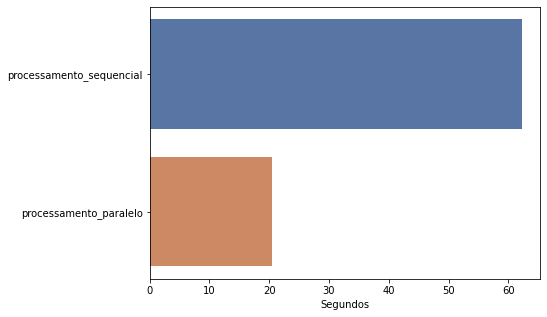

In [ ]:
# Análise comparando processamento sequencial x paralelo
x = [processamento_sequencial,processamento_paralelo]
y = ['processamento_sequencial','processamento_paralelo']
plt.figure(figsize = (7, 5))
sns.barplot(x=x, y=y, palette="deep")
plt.xlabel('Segundos')
plt.plot()